#### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset of medical images

In [2]:
png_images = ['./png/Image1.png', './png/Image2.png', './png/Image3.png', './png/Image4.png']

In [3]:
def ImageReader(images):
    
    # Reader
    reader = []
    for i in images:
        img = cv2.imread(i)
        reader.append(img)
        
    return reader

In [4]:
def displayer(images):
    
    # Displayer
    for img in images:
        plt.imshow(img)
        plt.show()

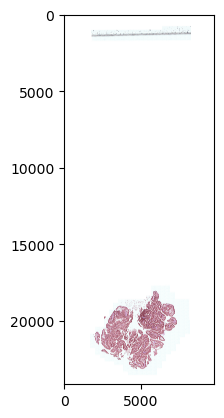

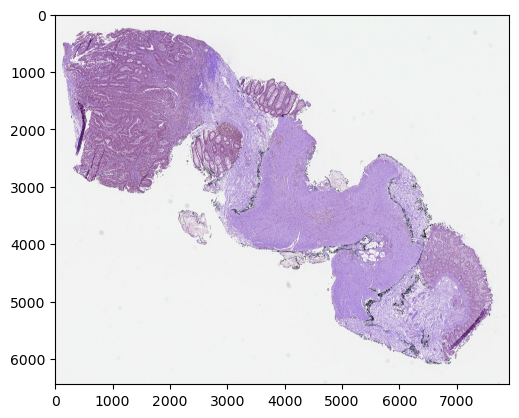

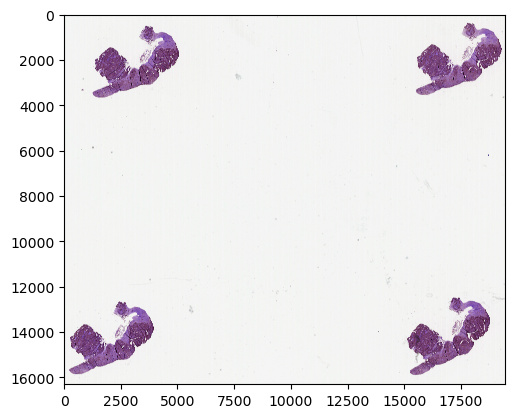

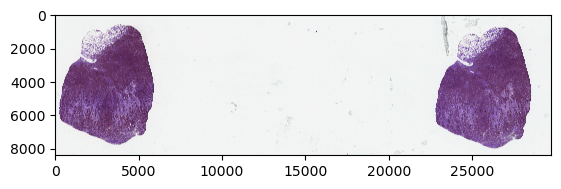

In [5]:
images = ImageReader(png_images)
displayer(images)

## Functions to perform Morphological Image Processing

In [6]:
kernel_size = 5

#### Dilation

In [7]:
def dilate_image(image, kernel_size):
    
    # Define a kernel for dilation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform dilation on the image
    dilate = cv2.dilate(image, kernel, iterations=1)
    
    return dilate

In [8]:
dilate = dilate_image(images[1], kernel_size)

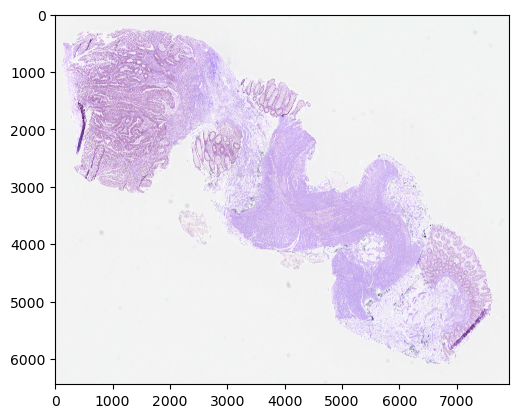

In [9]:
plt.imshow(dilate)
plt.show()

#### Eroision

In [10]:
def erod_image(image, kernel_size):
    
    # Define a kernel for dilation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform erosion on the image
    erod = cv2.erode(image, kernel, iterations=1)
    
    return erod

In [11]:
erod = erod_image(images[1], kernel_size)

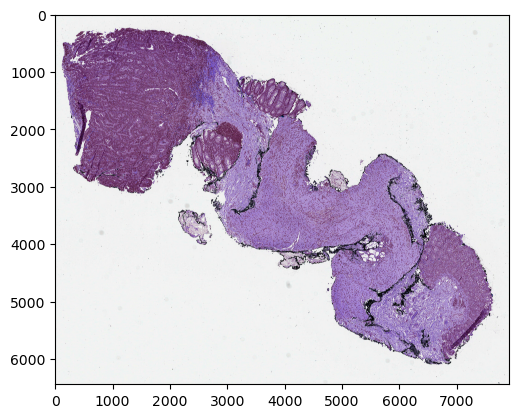

In [12]:
plt.imshow(erod)
plt.show()

#### Opening

In [13]:
def open_image(image, kernel_size):
    
    # Define a kernel for closing
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform opening on the image
    Open = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    return Open

In [14]:
Open = open_image(images[1], kernel_size)

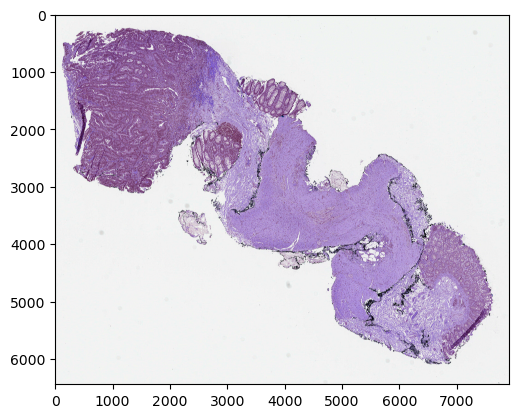

In [15]:
plt.imshow(Open)
plt.show()

#### Closing

In [16]:
def close_image(image, kernel_size):
    
    # Define a kernel for closing
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform closing on the image
    close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    return close

In [17]:
close = close_image(images[1], kernel_size)

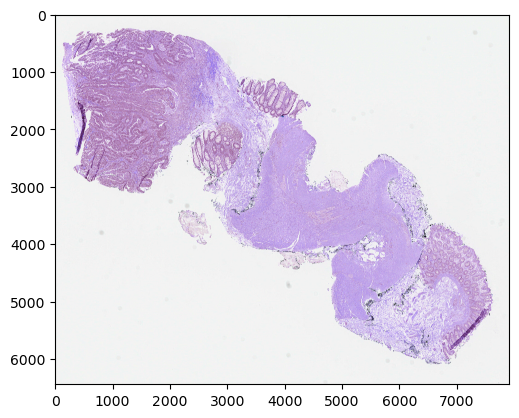

In [18]:
plt.imshow(close)
plt.show()

#### Morphological Image Processing

In [19]:
def MIP(image, kernel_size):
    
    dilated = dilate_image(image, kernel_size)
    cv2.imwrite('Dilated.png', dilated)
    
    eroded = erod_image(image, kernel_size)
    cv2.imwrite('Eroded.png', eroded)
    
    opened = open_image(image, kernel_size)
    cv2.imwrite('Opened.png', opened)
    
    closed = close_image(image, kernel_size)
    cv2.imwrite('Closed.png', closed)

In [20]:
MIP(images[1], 5)

## Main

In [20]:
def main(multiple_images):
    
    images = ImageReader(multiple_images)
    print("Total Images : ", len(images))
    updated = []
    
    kernel_size = 5
        
    for index, img in enumerate(images):
        
        i = MIP(img, kernel_size)
        cv2.imwrite(str(index + 1) + '_updated.png', i)
        updated.append(i)
    
        print("Images Processed : ", index + 1)
        
    return updated

In [21]:
updated = main(png_images)

Total Images :  4
Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4


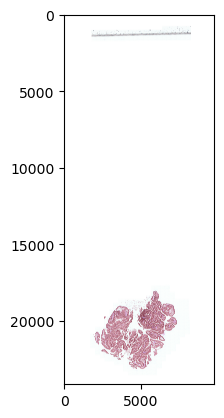

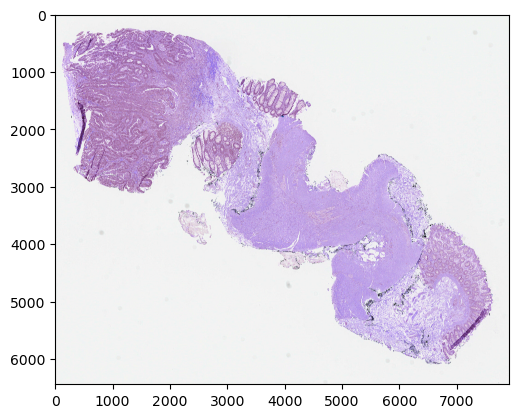

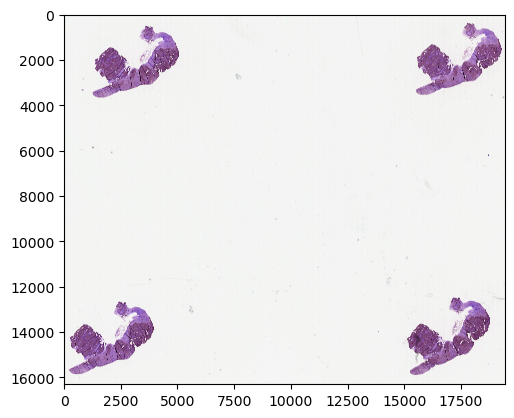

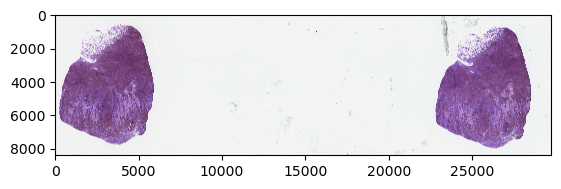

In [22]:
displayer(updated)